In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/main/seller.csv")
df_big = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/main/seller_big.csv")

In [ ]:
df.head()

,Seller_ID,Category,Unnamed: 2,Account_Age(months),Listings,Order_Return_Rate,Fullfillment_rate,Delay_Rate_rate,Cancelled_rate,Sentiment,Fraud/NOT
0,C94446004,Electronics,NaN,52,119,9,97,19,4,1,No
1,C92268667,Grocery & Gourmet Food,NaN,75,77,15,93,6,6,1,No
2,C35914970,Cameras & Photography,NaN,41,97,9,97,19,4,1,No
3,C79628889,Baby Products,NaN,92,121,16,99,6,4,1,No
4,C72332647,Grocery & Gourmet Food,NaN,26,97,13,82,7,6,1,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Seller_ID            10000 non-null  object 
 1   Category             10000 non-null  object 
 2   Unnamed: 2           0 non-null      float64
 3   Account_Age(months)  10000 non-null  int64  
 4   Listings             10000 non-null  int64  
 5   Order_Return_Rate    10000 non-null  int64  
 6   Fullfillment_rate    10000 non-null  int64  
 7   Delay_Rate_rate      10000 non-null  int64  
 8   Cancelled_rate       10000 non-null  int64  
 9   Sentiment            10000 non-null  int64  
 10  Fraud/NOT            10000 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 859.5+ KB


In [ ]:
df = df.drop("Unnamed: 2",axis=1)

In [ ]:
label_encoder = LabelEncoder()

# Apply label encoding
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Fraud/NOT'] = label_encoder.fit_transform(df['Fraud/NOT'])

In [ ]:
df.head(5)

,Seller_ID,Category,Account_Age(months),Listings,Order_Return_Rate,Fullfillment_rate,Delay_Rate_rate,Cancelled_rate,Sentiment,Fraud/NOT
0,C94446004,9,52,119,9,97,19,4,1,0
1,C92268667,12,75,77,15,93,6,6,1,0
2,C35914970,6,41,97,9,97,19,4,1,0
3,C79628889,3,92,121,16,99,6,4,1,0
4,C72332647,12,26,97,13,82,7,6,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = df.drop(columns=['Seller_ID'])

X = df.drop(columns=['Fraud/NOT'])
y = df['Fraud/NOT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1734
           1       0.96      0.73      0.83       266

    accuracy                           0.96      2000
   macro avg       0.96      0.86      0.90      2000
weighted avg       0.96      0.96      0.96      2000



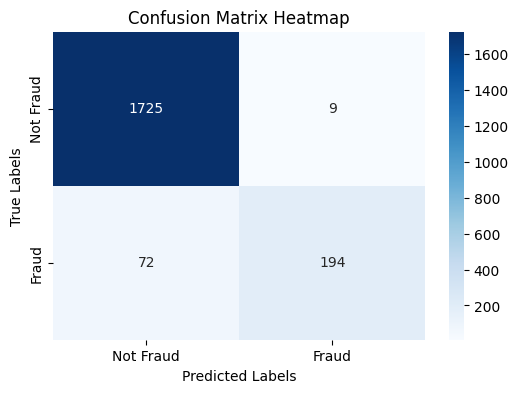

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [ ]:
import pickle
print(pickle.format_version)

4.0


=== Classification Report for Random Forest ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1734
           1       0.96      0.73      0.83       266

    accuracy                           0.96      2000
   macro avg       0.96      0.86      0.90      2000
weighted avg       0.96      0.96      0.96      2000



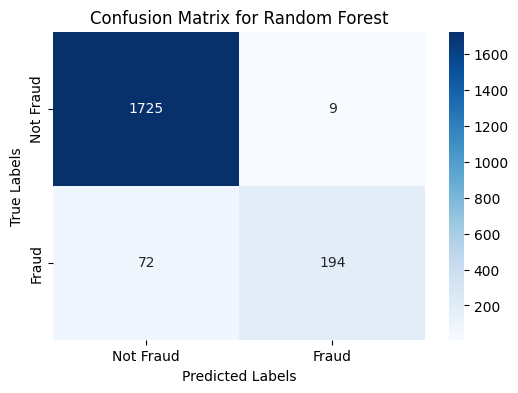

=== Classification Report for Logistic Regression ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1734
           1       0.96      0.73      0.82       266

    accuracy                           0.96      2000
   macro avg       0.96      0.86      0.90      2000
weighted avg       0.96      0.96      0.96      2000



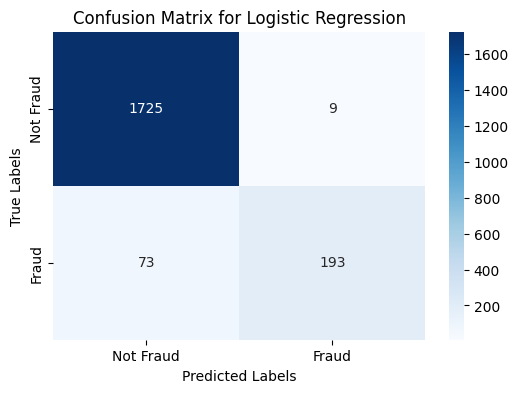

=== Classification Report for SVM ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1734
           1       0.96      0.73      0.83       266

    accuracy                           0.96      2000
   macro avg       0.96      0.86      0.90      2000
weighted avg       0.96      0.96      0.96      2000



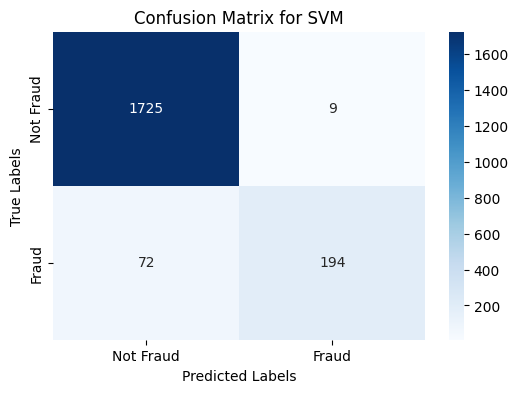

=== Classification Report for Decision Tree ===
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1734
           1       0.57      0.70      0.63       266

    accuracy                           0.89      2000
   macro avg       0.76      0.81      0.78      2000
weighted avg       0.90      0.89      0.89      2000



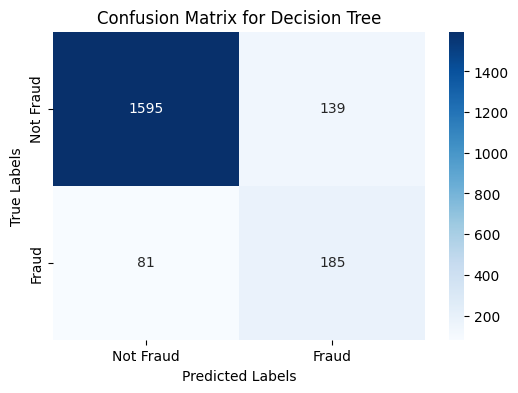

=== Classification Report for Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1734
           1       0.96      0.73      0.83       266

    accuracy                           0.96      2000
   macro avg       0.96      0.86      0.90      2000
weighted avg       0.96      0.96      0.96      2000



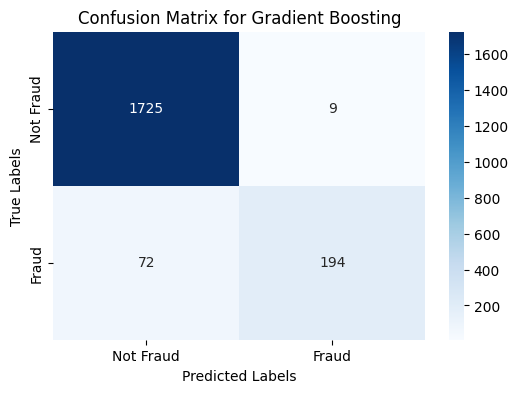

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Classification Report for XGBoost ===
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1734
           1       0.93      0.73      0.82       266

    accuracy                           0.96      2000
   macro avg       0.94      0.86      0.90      2000
weighted avg       0.96      0.96      0.95      2000



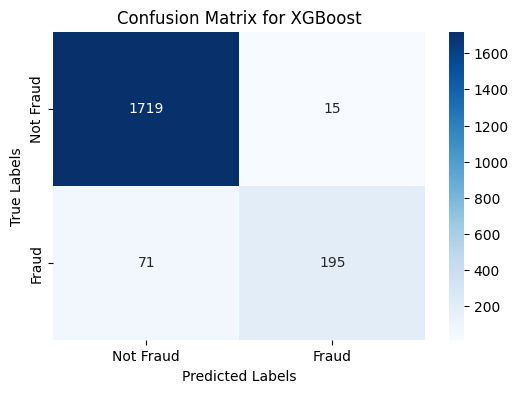

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print(f"=== Classification Report for {name} ===")
    print(classification_report(y_test, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# **THE BIGGER DATASET**

In [ ]:
df_big.head()

,Seller_ID,Category,Account_Age_months,Return_Rate_per_100,Fullfillment_Rate,Delay_Rate,Cancelled_Rate,Listings,Sentiment,Fraud/NOT
0,S60360365,Office Products,99,10,90,10,3,147,1,No
1,S89517400,Video Games & Consoles,65,7,85,15,6,222,1,No
2,S94771616,Beauty & Personal Care,83,4,91,5,3,258,1,No
3,S84492807,Sports & Outdoors,117,16,97,6,6,232,1,No
4,S75093014,Pet Supplies,107,5,94,10,3,206,0,No


In [ ]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Seller_ID            50000 non-null  object
 1   Category             50000 non-null  object
 2   Account_Age_months   50000 non-null  int64 
 3   Return_Rate_per_100  50000 non-null  int64 
 4   Fullfillment_Rate    50000 non-null  int64 
 5   Delay_Rate           50000 non-null  int64 
 6   Cancelled_Rate       50000 non-null  int64 
 7   Listings             50000 non-null  int64 
 8   Sentiment            50000 non-null  int64 
 9   Fraud/NOT            50000 non-null  object
dtypes: int64(7), object(3)
memory usage: 3.8+ MB


In [ ]:
# df = df_big.drop("Unnamed: 2",axis=1)
df = df_big

In [ ]:
label_encoder = LabelEncoder()

# Apply label encoding
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Fraud/NOT'] = label_encoder.fit_transform(df['Fraud/NOT'])

In [ ]:
df.head(5)

,Seller_ID,Category,Account_Age_months,Return_Rate_per_100,Fullfillment_Rate,Delay_Rate,Cancelled_Rate,Listings,Sentiment,Fraud/NOT
0,S60360365,22,99,10,90,10,3,147,1,0
1,S89517400,29,65,7,85,15,6,222,1,0
2,S94771616,4,83,4,91,5,3,258,1,0
3,S84492807,26,117,16,97,6,6,232,1,0
4,S75093014,23,107,5,94,10,3,206,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = df.drop(columns=['Seller_ID'])

X = df.drop(columns=['Fraud/NOT'])
y = df['Fraud/NOT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Train a Random Forest classifier
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

In [ ]:
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot the heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix Heatmap')
# plt.show()


=== Classification Report for Random Forest ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6745
           1       0.96      0.90      0.93      3255

    accuracy                           0.95     10000
   macro avg       0.96      0.94      0.95     10000
weighted avg       0.95      0.95      0.95     10000



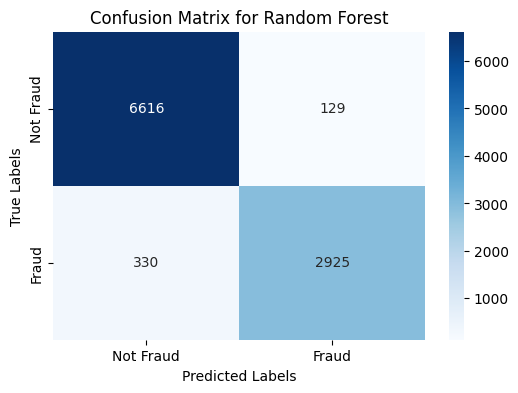

=== Classification Report for Logistic Regression ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6745
           1       0.96      0.90      0.93      3255

    accuracy                           0.95     10000
   macro avg       0.96      0.94      0.95     10000
weighted avg       0.95      0.95      0.95     10000



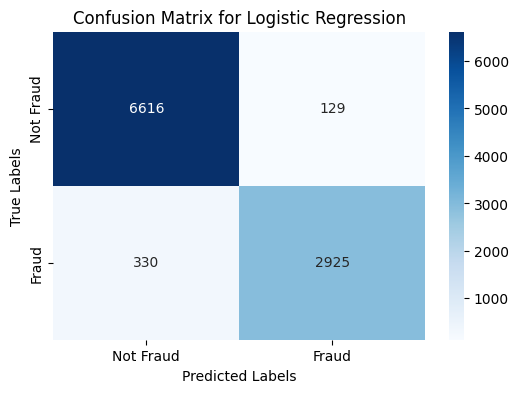

=== Classification Report for SVM ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6745
           1       0.96      0.90      0.93      3255

    accuracy                           0.95     10000
   macro avg       0.96      0.94      0.95     10000
weighted avg       0.95      0.95      0.95     10000



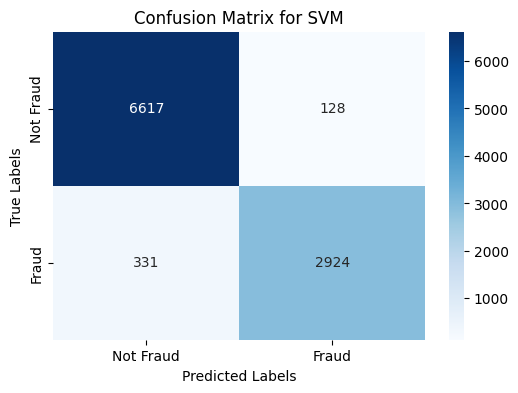

=== Classification Report for Decision Tree ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6745
           1       0.83      0.85      0.84      3255

    accuracy                           0.90     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.90      0.90      0.90     10000



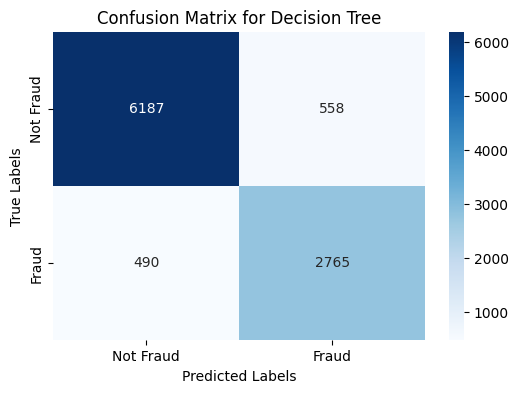

=== Classification Report for Gradient Boosting ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6745
           1       0.96      0.90      0.93      3255

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.95     10000
weighted avg       0.95      0.95      0.95     10000



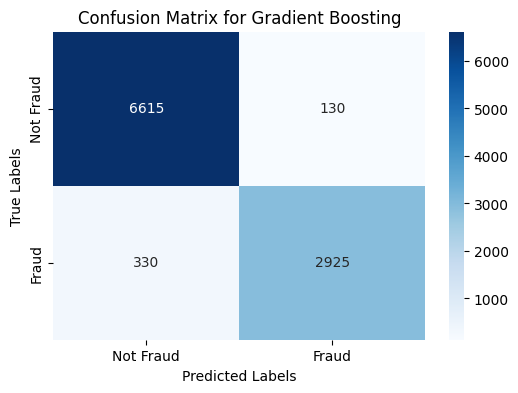

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:27:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


=== Classification Report for XGBoost ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6745
           1       0.96      0.90      0.93      3255

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.95     10000
weighted avg       0.95      0.95      0.95     10000



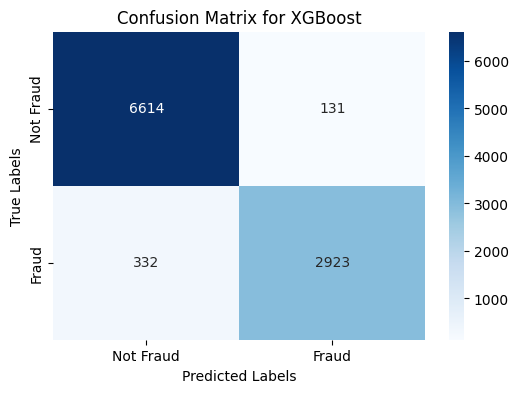

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    model_filename = f"/content/drive/MyDrive/Colab Notebooks/main/{name}.pkl"
    pickle.dump(model, open(model_filename, "wb"))
    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print(f"=== Classification Report for {name} ===")
    print(classification_report(y_test, y_pred))

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [ ]:
df['Category'].unique()

array([ 9, 12,  6,  3, 25, 27, 16, 18, 10,  4, 14,  7, 28, 22, 15,  1, 21,
        2, 11,  0, 13, 20, 23,  8, 24, 26, 17, 29, 19,  5])